### 목표
- 사전에 로컬환경에서 만들어둔 npz파일을 불러와서 신경망에 넣고 예측, 학습해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/data/animals.npz')

In [4]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(400, 224, 224, 3)
(100, 224, 224, 3)
(400,)
(100,)


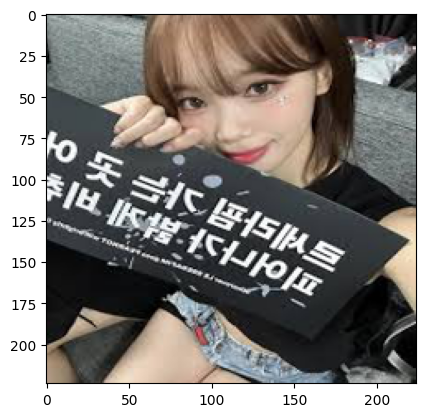

In [6]:
plt.imshow(X_train[6])

In [ ]:
X_train[3]
# 가장 내부 배열은 R,G,B값에 따른 각각의 수치값들(세 개의 수치로 하나의 픽셀의 색상을 최종 결정)
# 그 다음 배열은 가로 한 줄의 픽셀 값
# 최종 배열은 이미지 전체의 픽셀들을 표현

In [8]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

##MLP로 분류
- 직접 해보기!

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [10]:
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Flatten(input_shape =(224, 224,3)))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

# categorical_crossentropy : categorical_crossentropy에 정답의 원핫인코딩까지 같이 지원해줌
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['acc'])

h = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

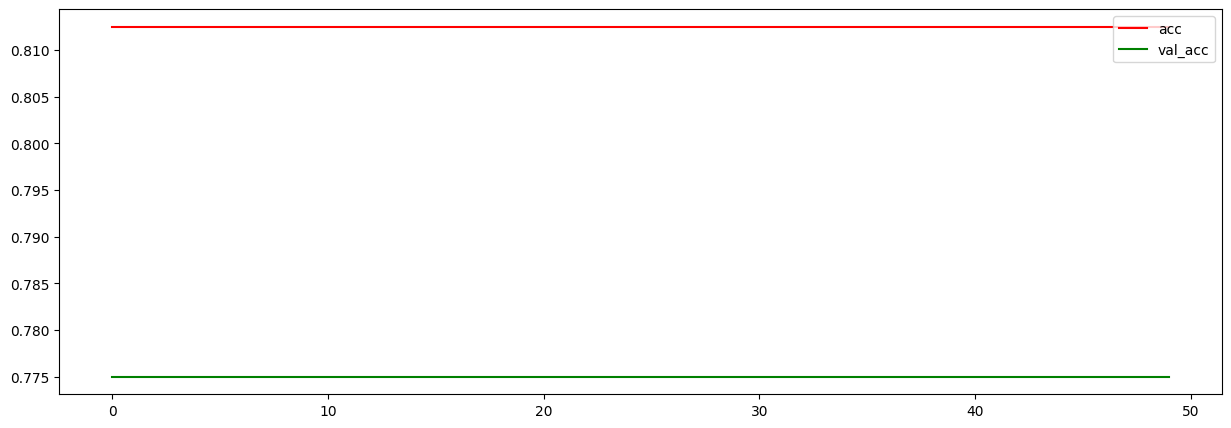

In [12]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc',color='red')
plt.plot(h.history['val_acc'], label='val_acc',color='green')
plt.legend(loc='upper right')
plt.show()

In [13]:
# 정확도 외에 정밀도, 재현율, F1스코어 까지 확인해보자 !
from sklearn.metrics import classification_report

In [14]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
pre = model.predict(X_test)
pre

In [16]:
# argmax : 가장 큰 값의 인덱스를 반환해주는 함수
# axis=1 : 예측값(pre)이 2차원 배열이므로 열 방향(좌->우)인 값들 중에서 비교하겠다는 뜻
np.argmax(pre, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# classification_report(평가율 정답, 모델이 예측한 정답)
print(classification_report(y_test, np.argmax(pre, axis= 1)))

# support : 데이터의 개수
# 즉 pre값이 각 클래스에 대한 확률로 나오기 때문에 그 중 가장 높ㅇ느 값의 인덱스와 실제 정답(y_test)을 비교하는 방식!

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.78      1.00      0.88        78
           2       0.00      0.00      0.00        12

    accuracy                           0.78       100
   macro avg       0.26      0.33      0.29       100
weighted avg       0.61      0.78      0.68       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 기존 MLP로는 3채널의 컬러이면서 배경이 전부 다른 다양하나 이미지들을 분류하는데 어려움이 있음!

CNN 모델링

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [19]:
cnn_model = Sequential()

# 1, 특성 추출부(Conv - 특징이 되는 정보를 추출)
cnn_model.add(Conv2D(input_shape=(224,224,3),
                     # 필터(돋보기)의 개수
                     filters=128,
                     # 필터의 크기
                     kernel_size=(3,3),
                     # same : 원본 데이터의 크기에 맞춰 태딩을 적용(valid : 패딩 적용X)
                     padding='same',
                     activation='relu'
                    ))

# 2, 특성 추출부(Pooting - 불필요한 정보를 삭제)
cnn_model.add(MaxPool2D()) # pool_size : 디폴트 값은(2 x 2)

cnn_model.add(Conv2D(
                     # 필터(돋보기)의 개수
                     filters=256,
                     # 필터의 크기
                     kernel_size=(3,3),
                     # same : 원본 데이터의 크기에 맞춰 태딩을 적용(valid : 패딩 적용X)
                     padding='same',
                     activation='relu'
                    ))
cnn_model.add(MaxPool2D())

# 3.MLP(분류기)
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))

cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

# CNN층 파라미터 수 계산
# 필터 크기(가로+세로+입력 데이터의 채널수) * 필터 개수 + 필터 개수(b값)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 802816)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [20]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc']
                  )

In [ ]:
cnn_model.fit(X_train,y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128
              )

In [22]:
pre = cnn_model.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis= 1)))

4/4 [==============================] - 2s 123ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.79      0.99      0.88        78
           2       0.00      0.00      0.00        12

    accuracy                           0.77       100
   macro avg       0.26      0.33      0.29       100
weighted avg       0.62      0.77      0.69       100



- CNN 신경망이지만 직접 만든 모델로 한 번에 좋은 결과를 얻기는 힘들다..ㅠ

# VGG16 전이학습

In [23]:
from tensorflow.keras.applications import VGG16

In [24]:
pre_trained_model = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet'
                          )
# include_top = False : 불러온 사전학습모델의 MLP층을 사용하지 않고 특성추출부마나 사용(=특성추출방)
# -> 기존 이미지넷 챌린지 대화는 1000가지의 이미지를 분류하는 대화였기 때문에 우리가 해결하고자 하는
#     3가지 이미지 분류와는 출력을 다르게 설정해줘야함!
# weights = 'Imagennet' : 이미지넷 챌린지 대화에서 학습된 가중치 w를 그대로 사용

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

In [27]:
cnn_model2 = Sequential()

cnn_model2.add(pre_trained_model)
# 사전학습 VGG16모델의 출력값
cnn_model2.add(Flatten())
cnn_model2.add(Dense(256, activation ='relu'))
cnn_model2.add(Dense(128, activation ='relu'))
cnn_model2.add(Dense(32, activation ='relu'))
cnn_model2.add(Dense(3, activation ='softmax'))
cnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               6422784   
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 21,174,595


In [ ]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc']
                  )

cnn_model2.fit(X_train,y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128
              )

In [29]:
pre = cnn_model2.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis= 1)))

4/4 [==============================] - 6s 415ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.81      1.00      0.90        78
           2       0.75      0.25      0.38        12

    accuracy                           0.81       100
   macro avg       0.52      0.42      0.42       100
weighted avg       0.72      0.81      0.74       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 결과는 일반 CNN보다 조금 더 좋아졌지만 더 튜닝해보자!

In [30]:
# 미세조정방식(우리 데이터에 맞게 일부 충돌을 재학습 시키는 방식)
pre_trained_model2 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet'
                          )

In [31]:
# 불러온 VGG16 모델의 특성추출부 충돌의 명칭을 출력
for layer in pre_trained_model2.layers :
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [32]:
for layer in pre_trained_model2.layers :
  if layer.name == 'block5_conv3':
    layer.trainable = True
    # 나머지는 충돌은 학습이 불가능하게 동결!
  else :
    layer.trainble = False

In [33]:
cnn_model3 = Sequential()

cnn_model3.add(pre_trained_model2)
# 사전학습 VGG16모델의 출력값
cnn_model3.add(Flatten())
cnn_model3.add(Dense(256, activation ='relu'))
cnn_model3.add(Dense(128, activation ='relu'))
cnn_model3.add(Dense(32, activation ='relu'))
cnn_model3.add(Dense(3, activation ='softmax'))

cnn_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               6422784   
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 21,174,595


In [ ]:
cnn_model3.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc']
                  )

cnn_model3.fit(X_train,y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128
              )

In [35]:
pre = cnn_model3.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis= 1)))

4/4 [==============================] - 1s 129ms/step
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.85      0.91      0.88        78
           2       0.38      0.25      0.30        12

    accuracy                           0.77       100
   macro avg       0.53      0.49      0.50       100
weighted avg       0.74      0.77      0.75       100



### 데이터 증강(Data Augmentation)
- 모델의 과대적합을 방지하기 위한 방법 중 하나로 훈련데이터를 더 늘려주는 기법

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
# ImageDataGenerator : 이미지 데이터를 생성하기 위한 조건을 설정해주는 함수

aug = ImageDataGenerator(rotation_range = 30, # 이미지의 회전 각도 설정(30도 내외로 회전)
                         width_shift_range = 0.2, # 20% 내외 수평이동
                         height_shift_range = 0.2, # 20% 내외 수직이동
                         zoom_range = 0.2, # 0.8 ~ 1.2배 확대/축소 기능
                         horizontal_flip = True, # 수평방향으로 뒤집기
                         fill_mode = 'nearest' # 이미지가 변형되면서 비는 공간을 가장 근처의 픽셀로 채워주는 기능
                         )

In [38]:
# 미세조정방식(우리 데이터에 맞게 일부 충돌을 재학습 시키는 방식)
pre_trained_model3 = VGG16(input_shape=(224,224,3),
                          include_top=False,
                          weights='imagenet'
                          )

for layer in pre_trained_model3.layers :
  if layer.name == 'block5_conv3':
    layer.trainable = True
    # 나머지는 충돌은 학습이 불가능하게 동결!
  else :
    layer.trainble = False

In [40]:
cnn_model4 = Sequential()

cnn_model4.add(pre_trained_model3)
cnn_model4.add(Flatten())
cnn_model4.add(Dense(256, activation ='relu'))
cnn_model4.add(Dense(128, activation ='relu'))
cnn_model4.add(Dense(32, activation ='relu'))
cnn_model4.add(Dense(3, activation ='softmax'))

cnn_model4.summary()

cnn_model4.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc']
                  )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_24 (Dense)            (None, 256)               6422784   
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dense_27 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,174,595
Trainable params: 21,174,595


In [ ]:
# flow : ImageDataGenerator로 설정한 조건을 통해 이미지를 실제로 생성해서 학습에 넣어주는 함수
cnn_model4.fit(aug.flow(X_train,y_train, batch_size = 128),
              # 한 epoch당 미니배치가 7.5번 돌고 끝나게 됨(즉 1epoch에 128 * 7.5로 총 960장의 새로운 이미지를 생성)
              steps_per_epoch = len(X_train) / 128,
              epochs=50,
              )

# 1epoch때 증강된 이미지 960개로 학습, 2epoch때는 960개가 추가되어서 1920개로 학습.....

In [42]:
pre = cnn_model4.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis= 1)))

4/4 [==============================] - 1s 130ms/step
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.92      0.99      0.95        78
           2       0.60      0.25      0.35        12

    accuracy                           0.86       100
   macro avg       0.69      0.61      0.62       100
weighted avg       0.84      0.86      0.84       100

